Importing Necessary Libraries

In [1]:
#Basic Libraries
#####################################
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


## Tensorflow
################################
import tensorflow as tf


## Scikit Learn elements
########################################
import sklearn
from sklearn.decomposition import PCA as pca
from sklearn.preprocessing import StandardScaler as sscl
from sklearn.preprocessing import LabelEncoder as lblencd
from sklearn.model_selection import train_test_split as tts

Importing Dataset

In [2]:
dftrain=pd.read_csv('train.csv')
dftest =pd.read_csv('test.csv')

Inspecting Dataset Shape

In [3]:
print('-'*40)
print('Train Dataset Shape : {}'.format(dftrain.shape))
print('-'*40)
print('Test Dataset Shape : {}'.format(dftest.shape))
print('-'*40)

----------------------------------------
Train Dataset Shape : (1460, 81)
----------------------------------------
Test Dataset Shape : (1459, 80)
----------------------------------------


Inspection of Datatypes

In [4]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Check Null Values for Train Set

In [5]:
train_null=dftrain.isnull().sum()
print(train_null.to_string())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

Check Null Values for Test Set

In [6]:
test_null=dftest.isnull().sum()
print(test_null.to_string())

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

Separating Feautures from Label for Training Dataset

In [7]:
features_train=dftrain.iloc[:,0:80]
label_train   =dftrain.iloc[:,80]

Imputing Missing Values for Training Dataset

In [8]:
########################### LotFrontage###############################

features_train['LotFrontage']=features_train.groupby('Neighborhood')['LotFrontage'].transform(lambda a: a.fillna(a.median()))


########################### Alley ###############################

features_train['Alley']=features_train['Alley'].fillna('No')



########################### BsmtQual ###############################

features_train['BsmtQual']=features_train['BsmtQual'].fillna('No')


########################### BsmtExposure ###############################

features_train['BsmtExposure']=features_train['BsmtExposure'].fillna('No')


########################### BsmtCond ###############################

features_train['BsmtCond']=features_train['BsmtCond'].fillna('No')


########################### BsmtFinType1 ###############################

features_train['BsmtFinType1']=features_train['BsmtFinType1'].fillna('No')

########################### BsmtFinType2 ###############################

features_train['BsmtFinType2']=features_train['BsmtFinType2'].fillna('No')

########################### Electrical ###############################

features_train['Electrical']=features_train.groupby('Neighborhood')['Electrical'].transform(lambda a: a.fillna(a.mode()[0]))


########################### FireplaceQu ###############################

features_train['FireplaceQu']=features_train['FireplaceQu'].fillna('No')

########################### GarageType   ###############################

features_train['GarageType']=features_train['GarageType'].fillna('No')

########################### GarageFinish ###############################

features_train['GarageFinish']=features_train['GarageFinish'].fillna('No')


########################### GarageYrBlt ###############################

features_train['GarageYrBlt']=features_train['GarageYrBlt'].fillna(0)


########################### GarageQual ###############################

features_train['GarageQual']=features_train['GarageQual'].fillna('No')


########################### GarageCond ###############################

features_train['GarageCond']=features_train['GarageCond'].fillna('No')



########################### PoolQC ###############################

features_train['PoolQC']=features_train['PoolQC'].fillna('No')


########################### Fence ###############################

features_train['Fence']=features_train['Fence'].fillna('No')


########################### MiscFeature ###############################

features_train['MiscFeature']=features_train['MiscFeature'].fillna('No')



########################### MasVnrType ###############################

features_train['MasVnrType']=features_train['MasVnrType'].fillna('No')


########################### MasVnrArea ###############################

features_train['MasVnrArea']=features_train['MasVnrArea'].fillna(0)

Imputing Missing Values for Test Dataset

In [9]:
########################### MSZoning ###############################

dftest['MSZoning']=dftest['MSZoning'].fillna(dftest.MSZoning.mode()[0])

########################### LotFrontage###############################

dftest['LotFrontage']=dftest.groupby('Neighborhood')['LotFrontage'].transform(lambda a: a.fillna(a.median()))


########################### Alley ###############################

dftest['Alley']=dftest['Alley'].fillna('No')


########################### Utilities ###############################

dftest['Utilities']=dftest['Utilities'].fillna(dftest.Utilities.mode()[0])



########################### Exterior1st ###############################

dftest['Exterior1st']=dftest['Exterior1st'].fillna('No')

########################### Exterior2nd ###############################

dftest['Exterior2nd']=dftest['Exterior2nd'].fillna('No')



########################### BsmtQual ###############################

dftest['BsmtQual']=dftest['BsmtQual'].fillna('No')


########################### BsmtExposure ###############################

dftest['BsmtExposure']=dftest['BsmtExposure'].fillna('No')


########################### BsmtCond ###############################

dftest['BsmtCond']=dftest['BsmtCond'].fillna('No')


########################### BsmtFinType1 ###############################

dftest['BsmtFinType1']=dftest['BsmtFinType1'].fillna('No')

########################### BsmtFinType2 ###############################

dftest['BsmtFinType2']=dftest['BsmtFinType2'].fillna('No')


#####'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'###

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    dftest[col] = dftest[col].fillna(0)




########################### KitchenQual ###############################

dftest['KitchenQual']=dftest.KitchenQual.fillna(dftest.KitchenQual.mode()[0])


########################### FireplaceQu ###############################

dftest['FireplaceQu']=dftest['FireplaceQu'].fillna('No')

########################### GarageType   ###############################

dftest['GarageType']=dftest['GarageType'].fillna('No')

########################### GarageFinish ###############################

dftest['GarageFinish']=dftest['GarageFinish'].fillna('No')


########################### GarageYrBlt ###############################

dftest['GarageYrBlt']=dftest['GarageYrBlt'].fillna(0)


########################### GarageQual ###############################

dftest['GarageQual']=dftest['GarageQual'].fillna('No')


########################### GarageCond ###############################

dftest['GarageCond']=dftest['GarageCond'].fillna('No')



########################### GarageCars ###############################

dftest['GarageCars']=dftest['GarageCars'].fillna(dftest['GarageCars'].median())

########################### GarageArea ###############################

dftest['GarageArea']=dftest['GarageArea'].fillna(dftest['GarageArea'].median())


########################### PoolQC ###############################

dftest['PoolQC']=dftest['PoolQC'].fillna('No')


########################### Fence ###############################

dftest['Fence']=dftest['Fence'].fillna('No')


########################### MiscFeature ###############################

dftest['MiscFeature']=dftest['MiscFeature'].fillna('No')



########################### MasVnrType ###############################

dftest['MasVnrType']=dftest['MasVnrType'].fillna('No')


########################### MasVnrArea ###############################

dftest['MasVnrArea']=dftest['MasVnrArea'].fillna(0)


########################### SaleType ###############################

dftest['SaleType']=dftest['SaleType'].fillna(dftest['SaleType'].mode()[0])

Dropping ID columns

In [10]:
test_id=dftest['Id']
features_train = features_train.drop("Id", axis='columns')
dftest = dftest.drop("Id", axis='columns')

Label Encoding

In [11]:
cols=list(dftest.columns)

############################## Label Encoding for Train #############
le=lblencd()

for i in cols:
    if str(features_train[i].dtype)=='object':
        features_train[i]=le.fit_transform(features_train[i])
        
        
############################## Label Encoding for Test #############

for i in cols:
    if str(dftest[i].dtype)=='object':
        dftest[i]=le.fit_transform(dftest[i])

Normalization of each columns of data set

In [12]:
scaler=sscl()
################################## Train Set ##########################
features_train= scaler.fit_transform(features_train)
    
    
################################## Test Set ###############################
dftest= scaler.fit_transform(dftest)

Performing PCA

In [13]:
##################################### Fitting PCA ###########################
pcas = pca(.9)
pcas.fit(features_train)
print("Number of PCA components are : {0}".format(pcas.n_components_))

##################################### Transform the Data ##################
train = pcas.fit_transform(features_train)
test  = pcas.fit_transform(dftest)

Number of PCA components are : 51


In [14]:
train,val,label_train,label_val=tts(train,label_train,test_size=0.2,random_state=42)

Building Neural Network Model for Prediction

In [15]:
#Build the neural network
tf.random.set_seed(42)
#create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(1)
])
#compile the model
model.compile(loss='mean_absolute_error',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.RootMeanSquaredError()]
)
#fit the model
history=model.fit(train,label_train,validation_data=(val,label_val),epochs=1000,batch_size=10,verbose=10)

Epoch 1/1000
Epoch 2/1000
Epoch 3/1000
Epoch 4/1000
Epoch 5/1000
Epoch 6/1000
Epoch 7/1000
Epoch 8/1000
Epoch 9/1000
Epoch 10/1000
Epoch 11/1000
Epoch 12/1000
Epoch 13/1000
Epoch 14/1000
Epoch 15/1000
Epoch 16/1000
Epoch 17/1000
Epoch 18/1000
Epoch 19/1000
Epoch 20/1000
Epoch 21/1000
Epoch 22/1000
Epoch 23/1000
Epoch 24/1000
Epoch 25/1000
Epoch 26/1000
Epoch 27/1000
Epoch 28/1000
Epoch 29/1000
Epoch 30/1000
Epoch 31/1000
Epoch 32/1000
Epoch 33/1000
Epoch 34/1000
Epoch 35/1000
Epoch 36/1000
Epoch 37/1000
Epoch 38/1000
Epoch 39/1000
Epoch 40/1000
Epoch 41/1000
Epoch 42/1000
Epoch 43/1000
Epoch 44/1000
Epoch 45/1000
Epoch 46/1000
Epoch 47/1000
Epoch 48/1000
Epoch 49/1000
Epoch 50/1000
Epoch 51/1000
Epoch 52/1000
Epoch 53/1000
Epoch 54/1000
Epoch 55/1000
Epoch 56/1000
Epoch 57/1000
Epoch 58/1000
Epoch 59/1000
Epoch 60/1000
Epoch 61/1000
Epoch 62/1000
Epoch 63/1000
Epoch 64/1000
Epoch 65/1000
Epoch 66/1000
Epoch 67/1000
Epoch 68/1000
Epoch 69/1000
Epoch 70/1000
Epoch 71/1000
Epoch 72/1000
E

Model Summary

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               6656      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               1

Plot the losses

Text(0.5, 0, 'Epochs')

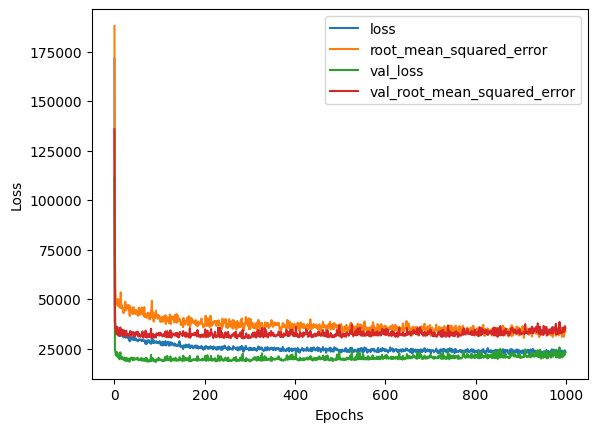

In [19]:
#plot history (Also known as loss  curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")